In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.style.use('/Users/summer/desktop/notebook.mplstyle');
%config InlineBackend.figure_format = 'retina'
colors = ["#2078B5", "#FF7F0F", "#2CA12C", "#D72827", "#9467BE", "#8C574B",
            "#E478C2", "#808080", "#BCBE20", "#17BED0", "#AEC8E9", "#FFBC79", 
            "#98E08B", "#FF9896", "#C6B1D6", "#C59D94", "#F8B7D3", "#C8C8C8", 
           "#DCDC8E", "#9EDAE6"]


In [2]:
def fast_fourier_transform(t,y):
    '''Return the fast Fourier transform of y.'''
    ŷ = np.fft.fft(y)
    ω = 2*np.pi*np.fft.fftfreq(len(time),time[1]-time[0])
    return ω,ŷ

In [3]:
I = 4
J = 8
F = 14

c = 10
b = 10
h = 1

dt = 0.0001
totstep = 200000

In [4]:
def lorenz96(xy,i,j):

    xy_dot[i] = (xy[0:I][(i-1)%I] * (xy[0:I][(i+1)%I] - xy[0:I][(i-2)%I]) - xy[0:I][i%I] + F - h*c/b*(np.sum([xy[I::][i::I]])))    
    xy_dot[I+j*I+i] = (c*b*xy[I:][((j+1)%J)*I+i]*(xy[I:][((j-1)%J)*I+i]-xy[I:][((j+2)%J)*I+i])-c*xy[I:][((j)%J)*I+i]+h*c/b*xy[0:I][i])

    #dx[i] = (x[(i-1)%I] * (x[(i+1)%I] - x[(i-2)%I]) - x[i%I] + F - h*c/b*(np.sum([y[jj%J,i] for jj in range(J)])))*dt     
    #dy[j,i] = (c*b*y[(j+1)%J,i]*(y[(j-1)%J,i]-y[(j+2)%J,i])-c*y[(j)%J,i]+h*c/b*x[i])*dt
    #print(i,j,xy_dot)

    return xy_dot

In [5]:
def RK4(xylist,step,i,j):
    
    oldxy = xylist[((I+J*I)*(step-1)):((I+J*I)*(step))]

    k1 = dt*lorenz96(oldxy,i,j)
    k2 = dt*lorenz96(oldxy + k1*0.5*dt,i,j)
    k3 = dt*lorenz96(oldxy + k2*0.5*dt,i,j)
    k4 = dt*lorenz96(oldxy + k3*dt,i,j)

    return oldxy + (k1 + 2*k2 + 2*k3 + k4)/6

In [6]:
x = np.random.rand(I)
y = np.random.rand(J,I)
#x= np.array([0.32312743, 0.68084138, 0.68702756, 0.87752116])
#x= np.array([0.3231274325157961, 0.6808413815594105, 0.6870275581069422, 0.8775211646916262])
#y=np.array([[0.45878852, 0.24426346, 0.17375543, 0.41534739],[0.6684705, 0.23366793, 0.27588951, 0.09632071],[0.01097495, 0.45473499, 0.6010255, 0.51196891],[0.73150277, 0.61561485, 0.88577859, 0.84420565],[0.02911555, 0.75803313, 0.77651468, 0.83750215], [0.28830338, 0.17070333, 0.0799056 , 0.20670024],[0.41379941, 0.95816018 ,0.8602284,  0.21104775], [0.56498182 ,0.91798109, 0.21188082, 0.13168289]])


xylist = np.zeros([(totstep)*(I+J*I)])
s=0

print(x)
print()
print(y)
print()

newx=[]
newlist = []
time=[0]

for ii in range(I):
    xylist[ii] = x[ii]
    #newx.append(x[ii])

newx.append([x[ii] for ii in range(len(x))])
print()
print(newx)
print()

for jjj in range(J):
    for iii in range(I):
        xylist[I + jjj*I + iii] = y[jjj,iii]
#print(xylist)

[0.46356618 0.68155457 0.89545879 0.19492862]

[[0.57815581 0.14342247 0.5364961  0.0701847 ]
 [0.86149909 0.23483008 0.04007398 0.62406309]
 [0.02128235 0.32694384 0.68242184 0.79097917]
 [0.97925856 0.42791101 0.85463964 0.35097415]
 [0.64139031 0.44494907 0.11355594 0.78383623]
 [0.77123732 0.01453958 0.42224755 0.68804369]
 [0.961343   0.10331093 0.8659253  0.50568075]
 [0.10358655 0.66959442 0.71325018 0.28148795]]


[[0.4635661831107203, 0.6815545662290616, 0.8954587939394383, 0.19492861909062564]]



In [7]:
for step in np.arange(1,totstep,1):
    
    xy_dot= np.zeros((I+J*I))
    
    for i in range(I):
        
        s+=1
        time.append(s)
        
        for j in range(J):
            
            xylist[(I+J*I)*(step):(I+J*I)*(step+1)] = RK4(xylist,step, i,j)
            
            newlist = xylist[(I+J*I)*(step):(I+J*I)*(step+1)][0:I]

        newx.append([newlist[ij] for ij in range(len(newlist))])
    
#print(xylist[-20::])
#print(time)
#print(len(time))

In [41]:
type(newx)

list

In [3]:
x1 = np.array([newx[a][0] for a in range(len(newx))])
x2 = np.array([newx[a][1] for a in range(len(newx))])
x3 = np.array([newx[a][2] for a in range(len(newx))])
x4 = np.array([newx[a][3] for a in range(len(newx))])

NameError: name 'np' is not defined

In [9]:
print(len(x1))

799997


In [10]:
print(x2)

[0.41662847 0.41662847 0.41767828 ... 1.71690196 1.71690196 1.71690196]


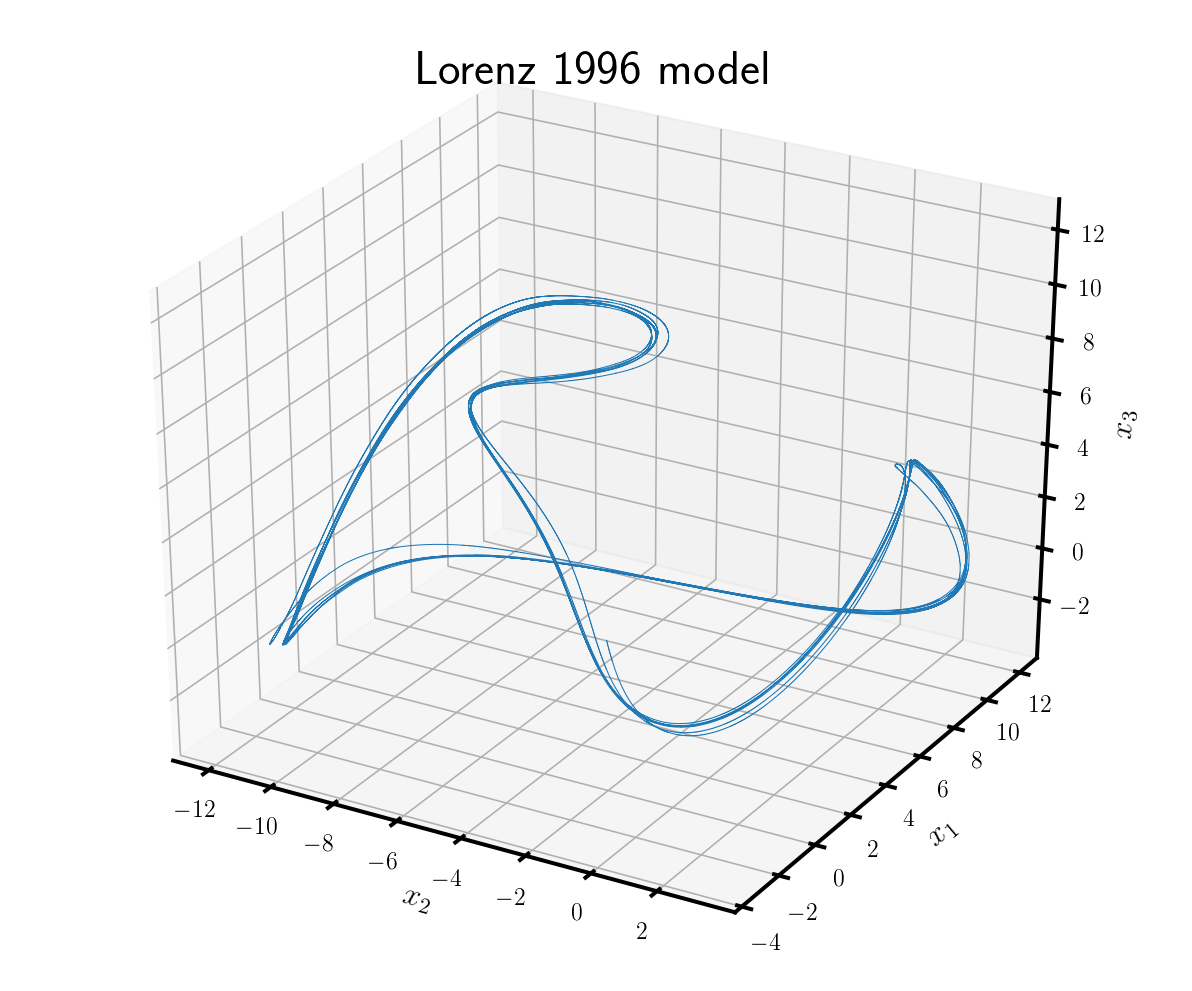

In [15]:
fig = plt.figure(figsize=(10,8))
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d')
ax.plot(-x2[380000:], x1[380000:], x3[380000:],lw=0.5)
ax.set_xlabel("$x_2$")
ax.set_ylabel("$x_1$")
#plt.xlim(4, -12)
ax.set_zlabel("$x_3$")
ax.set_title("Lorenz 1996 model")
plt.show()

In [34]:
np.save('xlisttxt', newx)
np.save('ylisttxt', y)

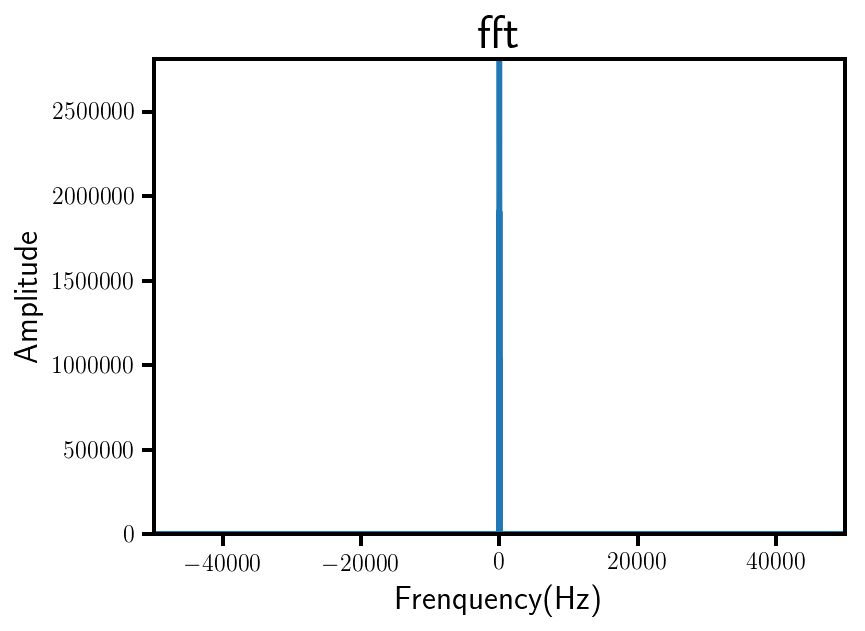

In [26]:
transform = np.absolute(np.fft.fft(x1))
freq = np.fft.fftfreq(len(time),1e-5) # time step is 10 microseconds
plt.figure()
plt.plot(freq,transform)
plt.xlabel('Frenquency(Hz)')
plt.ylabel('Amplitude')
plt.title('fft')
plt.show()

In [29]:
dt = 0.001
dd = 1
n = 500
Jmax = 51
Imax = 51

In [27]:
m = len(v0)
N = 10000
LE = np.zeros(m)
v = v0
tstep = 0.01

NameError: name 'v0' is not defined

In [32]:
m = len(v0)
N = 10000
LE = np.zeros(m)
v = v0
tstep = 0.01

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0


In [ ]:
def LEcalc(f,Df,v0,i,j):

    q=np.identity(m)
    
    Jt = @(x,A) A*x
    
    for n in range(N):
        
        DF1 = np.identity(m)
          
        for j in np.arange(1,1/tstep,1):
            
            #stepit(func, x, p, step)
            DF1 = RK4(Jt,DF1,Df(v,param),tstep)
    
            v = RK4(f,v,tstep,i,j)

        Z = DF1*q
        [q,r] = np.linalg.qr(Z)
        LE = LE + np.log(np.absolute(np.diag(r)))/N
        
        #np.log(np.amax(np.absolute(np.diag(r))))/(Imax-4)

In [ ]:
fig = plt.figure(figsize=(8,5))
plt.scatter(time,x1, s=0.5, marker='.', c='black')
# title and labels
plt.ylabel(r'$x_1$')
plt.xlabel('time')
plt.title('1996 Lorenz model',fontsize=15)
plt.xlim(time[2400000],time[2850000])

frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])

plt.ylim(-10,15)
plt.show()

799997


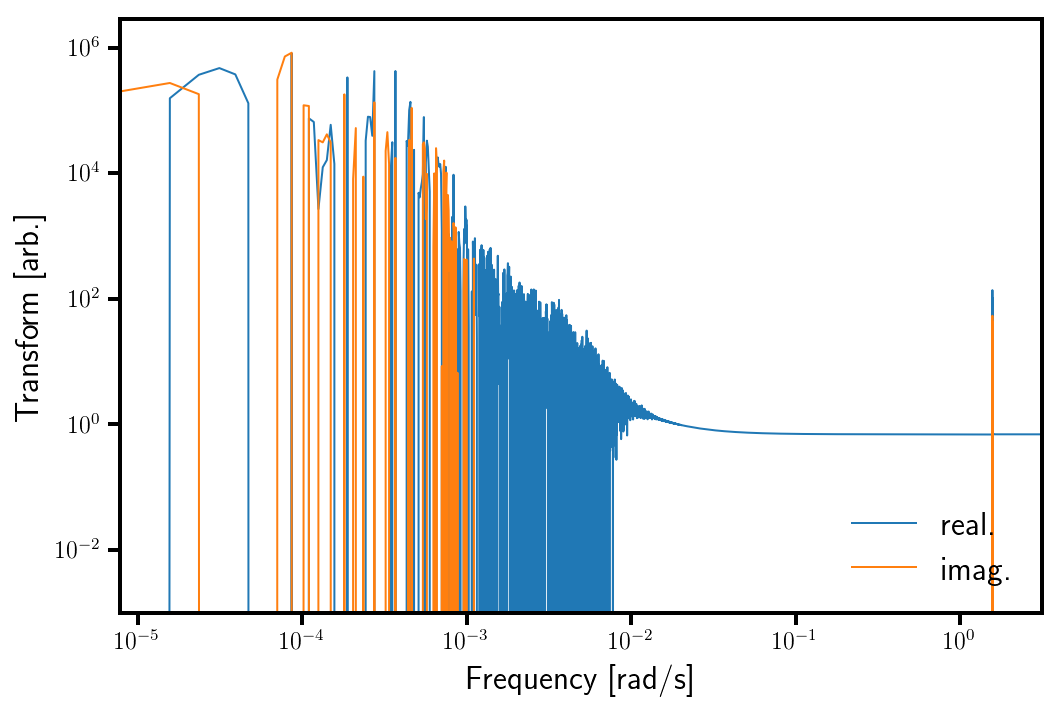

In [16]:
# Get the discrete FT
ω,ŷ = fast_fourier_transform(time,x1)
print(len(time))
# Plot the real and imaginary parts of the DFT
fig = plt.figure(figsize=(8,5))
plt.loglog(ω,ŷ.real,label='real.',lw=1)
plt.loglog(ω,ŷ.imag,label='imag.',lw=1)
#plt.xlim(0,np.max(ω))
#plt.xlim(1,10**5)
#plt.ylim(-100000,100000)
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Transform [arb.]')
plt.legend(loc='lower right')

Text(0,0.5,'Power [arb]')

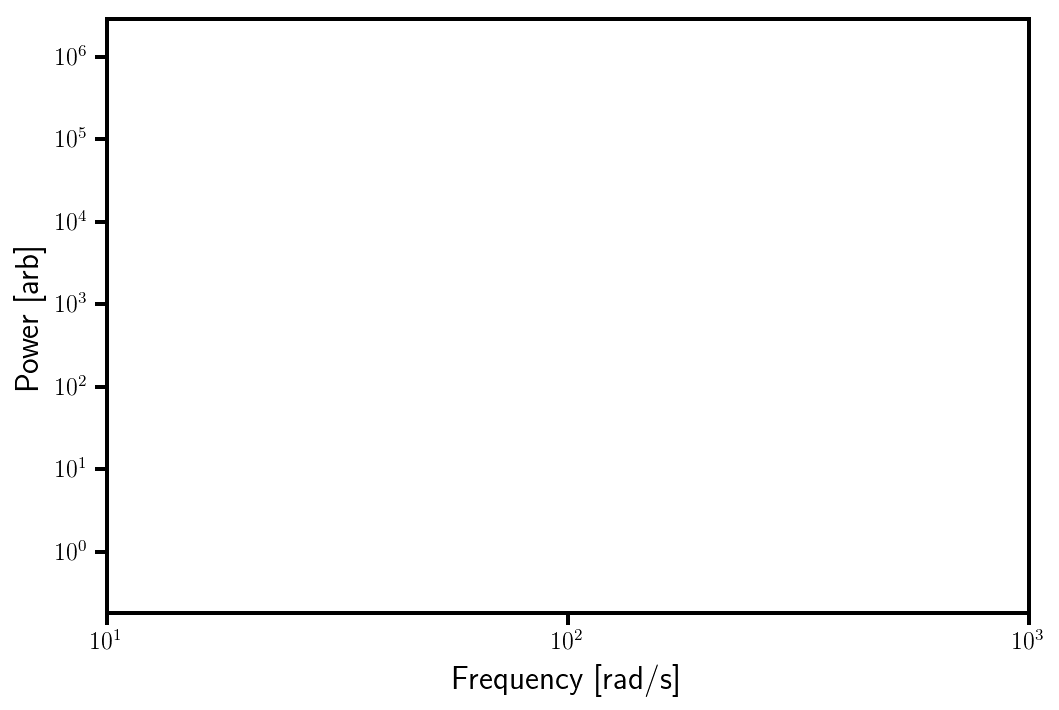

In [18]:
# Get the discrete FT
ω,ŷ = fast_fourier_transform(time,x1)

# Plot the real and imaginary parts of the DFT
fig = plt.figure(figsize=(8,5))
plt.loglog(ω,np.abs(ŷ),lw=1)
plt.xlim(10,10**3)
#plt.ylim(1,10**6)
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Power [arb]')

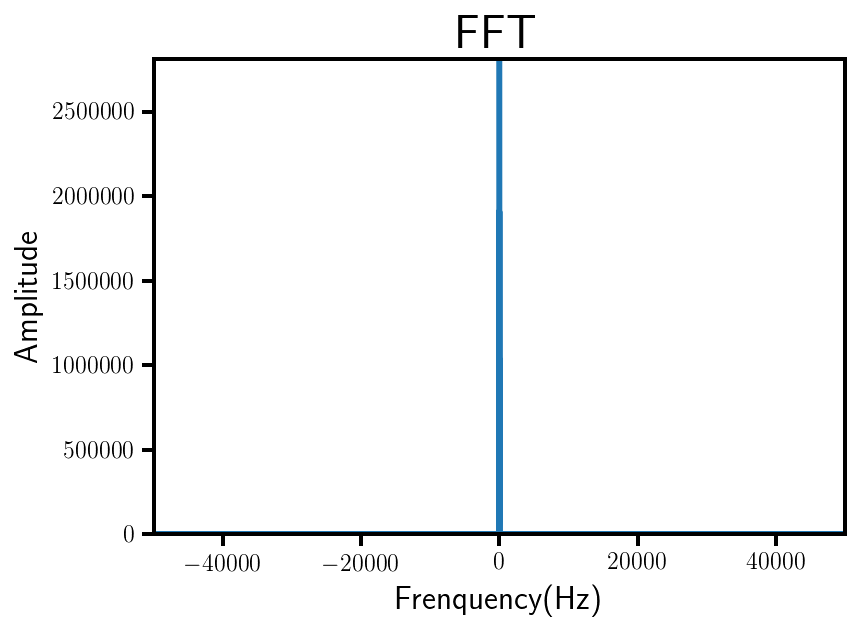

In [14]:
transform = np.absolute(np.fft.fft(x1))
freq = np.fft.fftfreq(len(time),1e-5) # time step is 10 microseconds
plt.figure()
plt.plot(freq,transform)
plt.xlabel('Frenquency(Hz)')
plt.ylabel('Amplitude')
plt.title('FFT')
plt.show()